In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [5]:
data_file = r"C:\Users\Barbara\Documents\Radboud uni\Internship at Francesco's lab\Programming Davide\Jupyter\neural_data.pickle"
filehandler = open(data_file, 'rb')
neural_data = pickle.load(filehandler)
filehandler.close()

In [3]:
type(neural_data)

dict

In [4]:
neural_data.keys()

dict_keys(['traces', 'footprints', 'df_f', 'deconvolved', 'positions', 'contour'])

In [6]:
x = neural_data['deconvolved']

In [7]:
tr = neural_data['traces']

In [8]:
tr.shape

(132, 29000)

In [9]:
pos = neural_data['positions']

In [10]:
type(x)

list

In [11]:
type(tr)

numpy.ndarray

In [12]:
type(pos)

numpy.ndarray

In [13]:
contour = neural_data['contour']
df_f = neural_data['df_f']
ftp = neural_data['footprints']

In [14]:
type(contour)

list

In [15]:
type(df_f)

numpy.ndarray

In [16]:
type(ftp)

numpy.ndarray

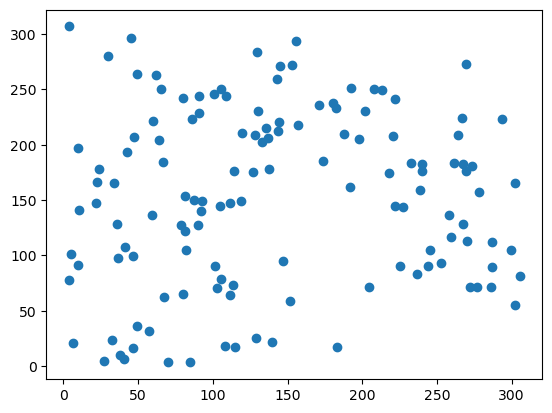

In [17]:
#visualize positions
plt.scatter(pos[0:132,1],pos[:,0])

In [18]:
?plt

In [39]:
len(x)#number of neurons

132

C:\Users\Barbara\AppData\Local\Temp\ipykernel_10800\1402822918.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.eventplot(np.array(x)[idxs]);


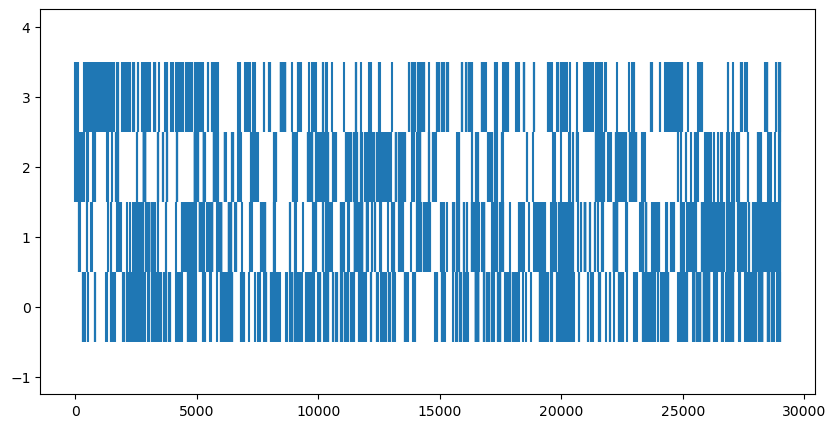

In [19]:
plt.figure(figsize=(10,5))
idxs = [0,2,10,70]
plt.eventplot(np.array(x)[idxs]);

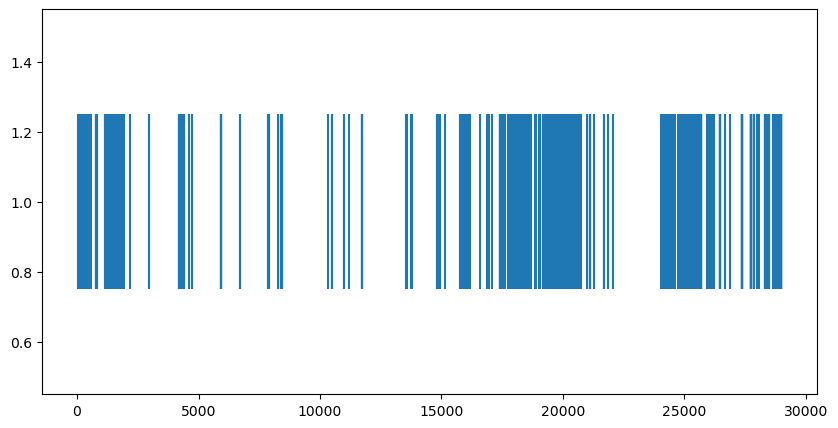

In [20]:
plt.figure(figsize=(10,5))
for i in range(len(x)):
    plt.eventplot(x[i],lineoffset=i,linelengths=0.5)#first element of the list

In [21]:
import scipy.stats as stats

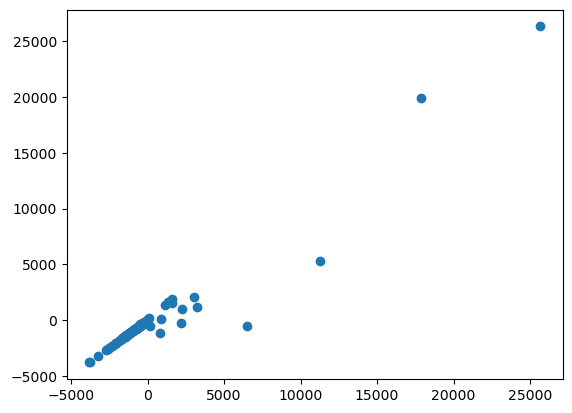

In [22]:
plt.scatter(tr[0:132,1],tr[:,0])

## How to calculate correlation and to plot it

In [23]:
x = tr[:,1]
y = tr[:,0]
np.corrcoef(x,y)

array([[1.       , 0.9600103],
       [0.9600103, 1.       ]])

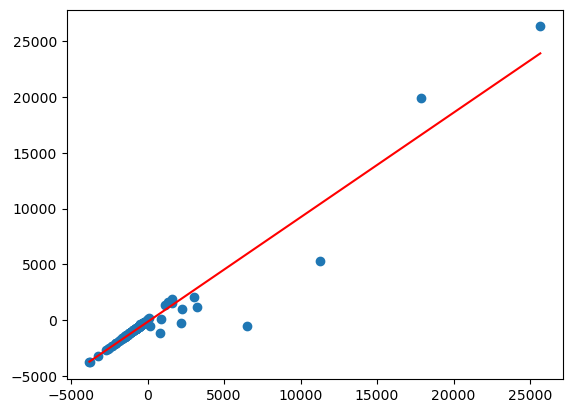

In [24]:
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

In [25]:
cormat=np.corrcoef(tr)

In [26]:
cormat.shape

(132, 132)

size of correlation matrix is  (132, 132)


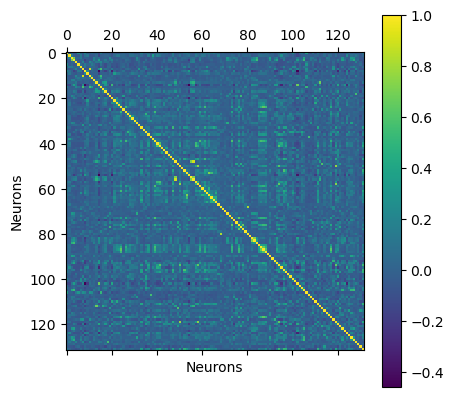

In [27]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


# compute correlation matrix
cormat = np.corrcoef(tr)

#check size of correlation matrix, it should be neurons x neurons
print("size of correlation matrix is ", cormat.shape)

plt.matshow(cormat)
plt.colorbar()
plt.xlabel("Neurons")
plt.ylabel("Neurons")
# plt.title("Example Correaltion Matrix")
plt.show()


size of correlation matrix is  (132, 132)


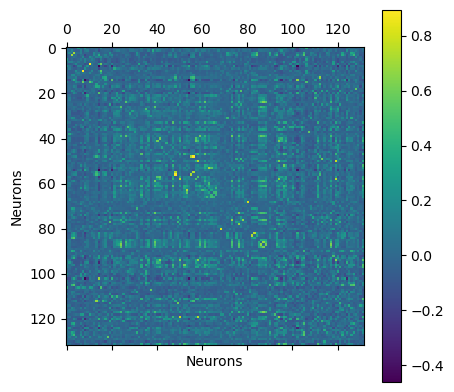

In [28]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


# compute correlation matrix
cormat = np.corrcoef(tr)
np.fill_diagonal(cormat,0)


#check size of correlation matrix, it should be neurons x neurons
print("size of correlation matrix is ", cormat.shape)

plt.matshow(cormat)
plt.colorbar()
plt.xlabel("Neurons")
plt.ylabel("Neurons")
# plt.title("Example Correaltion Matrix")
plt.show()


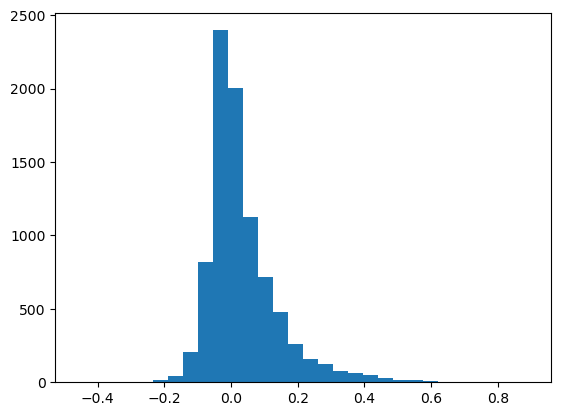

In [29]:
plt.hist(cormat[np.triu_indices_from(cormat,k=1)],bins=30);

In [30]:
cormat[np.triu_indices_from(cormat,k=1)]

array([ 0.02205199, -0.00054979, -0.05454058, ..., -0.05015762,
        0.02760382, -0.05605315])

In [31]:
def randomize_traces(tr):
    '''
    Takes trace matrix, returns matrix of traces each shifted by a random amount.
    PARAMETERS:
    tr (n_neurons x n_timepoints): 2d array of traces
    
    RETURNS:
    randomized_traces (n_neurons x n_timepoints): the randomized traces
    '''

    randomized_tr = np.zeros_like(tr)
    for i,vec in enumerate(tr):
        rand_shift = np.random.choice(np.arange(len(vec)))
        randomized_tr[i,:] = np.roll(vec,rand_shift)
        
    return randomized_tr

In [32]:
r_tr = randomize_traces(tr)

In [33]:
rcormat = np.corrcoef(r_tr)
np.fill_diagonal(rcormat,0)

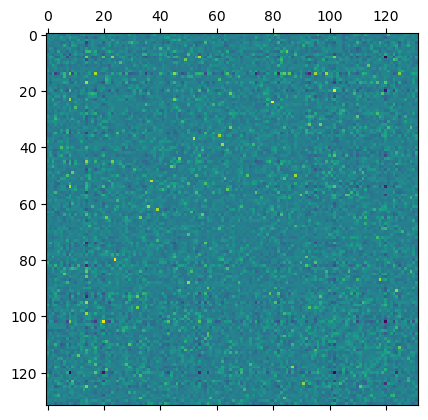

In [34]:
plt.matshow(rcormat)

Text(0, 0.5, 'Number of neuron pairs')

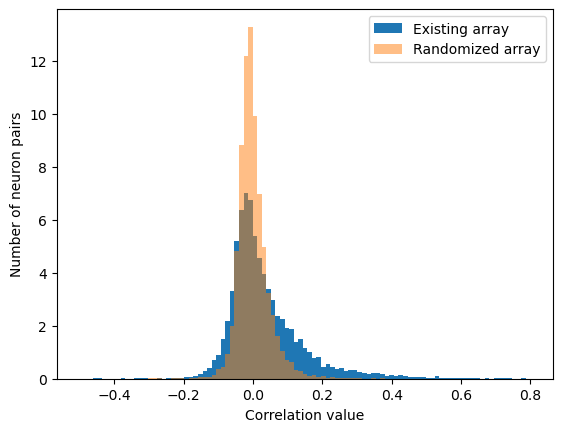

In [50]:
plt.hist(cormat[np.triu_indices_from(cormat,k=1)],bins=np.linspace(-0.5,0.8,100), density=True,
         label='Existing array');
plt.hist(rcormat[np.triu_indices_from(rcormat,k=1)],bins=np.linspace(-0.5,0.8,100),density=True, alpha=0.5,
         label='Randomized array');
plt.legend(loc="upper right")
plt.xlabel('Correlation value')
plt.ylabel('Number of neuron pairs')

Text(0, 0.5, 'Number of neuron pairs')

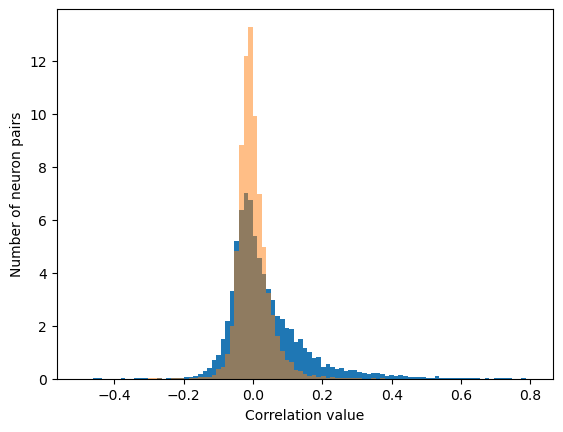

In [39]:
plt.hist(cormat[np.triu_indices_from(cormat,k=1)],bins=np.linspace(-0.5,0.8,100),density=True);
plt.hist(rcormat[np.triu_indices_from(rcormat,k=1)],bins=np.linspace(-0.5,0.8,100),density=True,alpha=0.5);
plt.xlabel('Correlation value')
plt.ylabel('Number of neuron pairs')